In [12]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.test.is_gpu_available():
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
data = pd.read_csv("C:\\Users\\Yeab\\Desktop\\college\\AI\\Assignments\\Term Project\\this.csv")

In [3]:
data.head()


,Unnamed: 0,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,1,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,benzin,volkswagen,1,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,3,private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,1,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,4,private,offer,1500,test,kleinwagen,2001,manual,75,golf,150000,6,benzin,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,5,private,offer,3600,test,kleinwagen,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
# a function to calculate the number of days.
def dateValue(lst):
    values = []
    for i in lst:
        string = i
        string = string.split(" ")[0]
        string = string.split("-")
        year = int(string[0])*365
        month = int(string[1])*30
        day = int(string[2])
        dateValueString = year+month+day
        values.append(dateValueString)
    return values

In [5]:
dateCreated = dateValue(data.dateCreated)
lastSeen = dateValue(data.lastSeen)
data = data.drop(columns="lastSeen")
data = data.drop(columns = "dateCreated")
data.insert(17, "lastSeen", lastSeen)
data.insert(17, "dateCreated", dateCreated)

In [6]:
data.head()

,Unnamed: 0,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode,dateCreated,lastSeen
0,1,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,benzin,volkswagen,1,0,70435,735954,735967
1,2,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,0,66954,735954,735967
2,3,private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,1,0,90480,735944,735965
3,4,private,offer,1500,test,kleinwagen,2001,manual,75,golf,150000,6,benzin,volkswagen,no,0,91074,735947,735947
4,5,private,offer,3600,test,kleinwagen,2008,manual,69,fabia,90000,7,diesel,skoda,no,0,60437,735961,735966


In [7]:
daysOnline = []
for i in range(len(dateCreated)):
    val = int(data.lastSeen[i]) - int(data.dateCreated[i])
    daysOnline.append(val)
data.insert(19, "DaysOnline", daysOnline)
data = data.drop(columns = "dateCreated")
data = data.drop(columns = "lastSeen")

In [8]:
data.head()

,Unnamed: 0,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode,DaysOnline
0,1,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,benzin,volkswagen,1,0,70435,13
1,2,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,0,66954,13
2,3,private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,1,0,90480,21
3,4,private,offer,1500,test,kleinwagen,2001,manual,75,golf,150000,6,benzin,volkswagen,no,0,91074,0
4,5,private,offer,3600,test,kleinwagen,2008,manual,69,fabia,90000,7,diesel,skoda,no,0,60437,5


In [9]:
data.seller, uniquesSeller = pd.factorize(data.seller)
data.offerType, uniquesofferType = pd.factorize(data.offerType)
data.abtest, uniquesAbtest = pd.factorize(data.abtest)
data.vehicleType, uniquesVehicleType = pd.factorize(data.vehicleType)
data.gearbox, uniquesGearbox = pd.factorize(data.gearbox)
data.model, uniquesModel = pd.factorize(data.model)
data.fuelType, uniquesFuelType = pd.factorize(data.fuelType)
data.notRepairedDamage, uniquesNotRepairedDamage = pd.factorize(data.notRepairedDamage)

data.head()

,Unnamed: 0,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode,DaysOnline
0,1,0,0,480,0,-1,1993,0,0,0,150000,0,0,volkswagen,0,0,70435,13
1,2,0,0,18300,0,0,2011,0,190,-1,125000,5,1,audi,1,0,66954,13
2,3,0,0,9800,0,1,2004,1,163,1,125000,8,1,jeep,0,0,90480,21
3,4,0,0,1500,0,2,2001,0,75,0,150000,6,0,volkswagen,2,0,91074,0
4,5,0,0,3600,0,2,2008,0,69,2,90000,7,1,skoda,2,0,60437,5


In [10]:
import matplotlib.pyplot as plt

(array([    0.,     0.,     0., ...,     0.,     0., 26412.]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 <a list of 189348 Patch objects>)

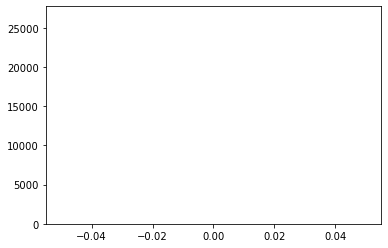

In [11]:
plt.hist(data.DaysOnline, data.nrOfPictures, color = 'green', 
        histtype = 'bar', rwidth = 0.8) 